In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv("aqi_data.csv", parse_dates=True, index_col="Date")
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
df = df[["City", "AQI_Bucket", "AQI"]]

cities = pd.unique(df['City'])
column1, column2 = cities + "_AQI", cities + "_AQI_Bucket"
columns = [*column1, *column2]

In [4]:
preprocessed_df = pd.DataFrame(
    index=np.arange('2015-01-01', '2020-07-02', dtype='datetime64[D]'),
    columns=column1
)

for city, column in zip(cities, preprocessed_df.columns):
    n = len(np.array(df[df['City'] == city]['AQI']))
    preprocessed_df.iloc[-n:, preprocessed_df.columns.get_loc(column)] = np.array(df[df['City'] == city]['AQI'])

In [5]:
preprocessed_df = preprocessed_df.astype("float64")
preprocessed_df = preprocessed_df.resample(rule="MS").mean()

preprocessed_df["India_AQI"] = preprocessed_df.mean(axis=1)
print(preprocessed_df.isna().sum()/preprocessed_df.shape[0])

Ahmedabad_AQI             0.238806
Aizawl_AQI                0.925373
Amaravati_AQI             0.522388
Amritsar_AQI              0.373134
Bengaluru_AQI             0.029851
Bhopal_AQI                0.835821
Brajrajnagar_AQI          0.567164
Chandigarh_AQI            0.835821
Chennai_AQI               0.029851
Coimbatore_AQI            0.805970
Delhi_AQI                 0.000000
Ernakulam_AQI             0.895522
Gurugram_AQI              0.179104
Guwahati_AQI              0.731343
Hyderabad_AQI             0.029851
Jaipur_AQI                0.432836
Jorapokhar_AQI            0.477612
Kochi_AQI                 0.895522
Kolkata_AQI               0.597015
Lucknow_AQI               0.029851
Mumbai_AQI                0.597015
Patna_AQI                 0.208955
Shillong_AQI              0.835821
Talcher_AQI               0.552239
Thiruvananthapuram_AQI    0.432836
Visakhapatnam_AQI         0.343284
India_AQI                 0.000000
dtype: float64


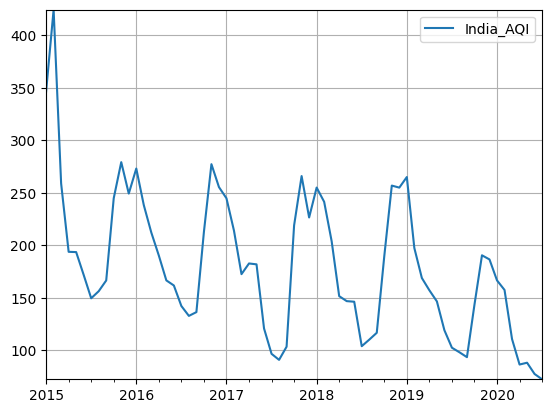

In [6]:
ax = preprocessed_df[['India_AQI']].plot(grid=True)
ax.autoscale(enable=True, axis='both', tight=True)

In [7]:
preprocessed_df.to_csv("preprocessed_aqi.csv")